## Notes
On collier machine this uses anaconda geospatial env (source activate geospatial)
Does NOT currently work with pipenv because of failing geospatial libraries

In [21]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import shape, point
import adjustText as aT
import sys

In [22]:
buncombe_tract_geo = gpd.read_file('./shape_file_dir/buncombe_bg.shp')
buncombe_tract_geo.index = buncombe_tract_geo['GEOID']
buncombe_tract_geo = buncombe_tract_geo.drop(['AFFGEOID', 'ALAND', 'AWATER', 'COUNTYFP', 'LSAD', 'STATEFP', 'TRACTCE'], axis=1)
# buncombe_tract_geo.head()

In [23]:
buncombebg = pd.read_csv('uemp_nohs.csv')
buncombebg.columns = [['fips_id', 'percent_unemployed', 'percent_nohs']]
# buncombebg.head()

In [28]:
buncombebg['GEOID'] = buncombebg.fips_id.astype(str)
buncombebg['GEOID'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
buncombebg['GEOID'].astype(str)
buncombebg['GEOID'] = buncombebg['GEOID'].str[-12:]
buncombebg['bg_label'] = buncombebg['GEOID'].str[-5:]
buncombebg.index = pd.to_numeric(buncombebg['GEOID'])
# buncombebg.head()

In [29]:
gpd = buncombe_tract_geo.merge(buncombebg)
gpd.head()

,BLKGRPCE,GEOID,NAME,geometry,fips_id,percent_unemployed,percent_nohs,bg_label
0,2,370210003002,2,"POLYGON ((-82.56777 35.606625, -82.564109 35.6...","Block Group 2, Census Tract 3, Buncombe County...",4.488778,5.450734,03002
1,1,370210019001,1,"POLYGON ((-82.502804 35.58734, -82.501977 35.5...","Block Group 1, Census Tract 19, Buncombe Count...",7.891156,10.900474,19001
2,2,370210022042,2,"POLYGON ((-82.536917 35.509338, -82.537559 35....","Block Group 2, Census Tract 22.04, Buncombe Co...",10.652921,1.484480,22042
3,3,370210005003,3,"POLYGON ((-82.554647 35.623198, -82.5539359999...","Block Group 3, Census Tract 5, Buncombe County...",4.620853,3.975265,05003
4,3,370210012003,3,"POLYGON ((-82.60565199999999 35.573349, -82.60...","Block Group 3, Census Tract 12, Buncombe Count...",0.000000,3.237410,12003


create a geo dataframe for labels

https://github.com/shotleft/how-to-python/blob/master/How%20it%20works%20-%20labelling%20districts%20in%20GeoPandas.ipynb

In [30]:
gpd["center"] = gpd["geometry"].centroid
gpd_points = gpd.copy()
gpd_points.set_geometry("center", inplace = True)

Text(0.5,1,'Buncombe County, NC - Unemployment by Census Block Group')

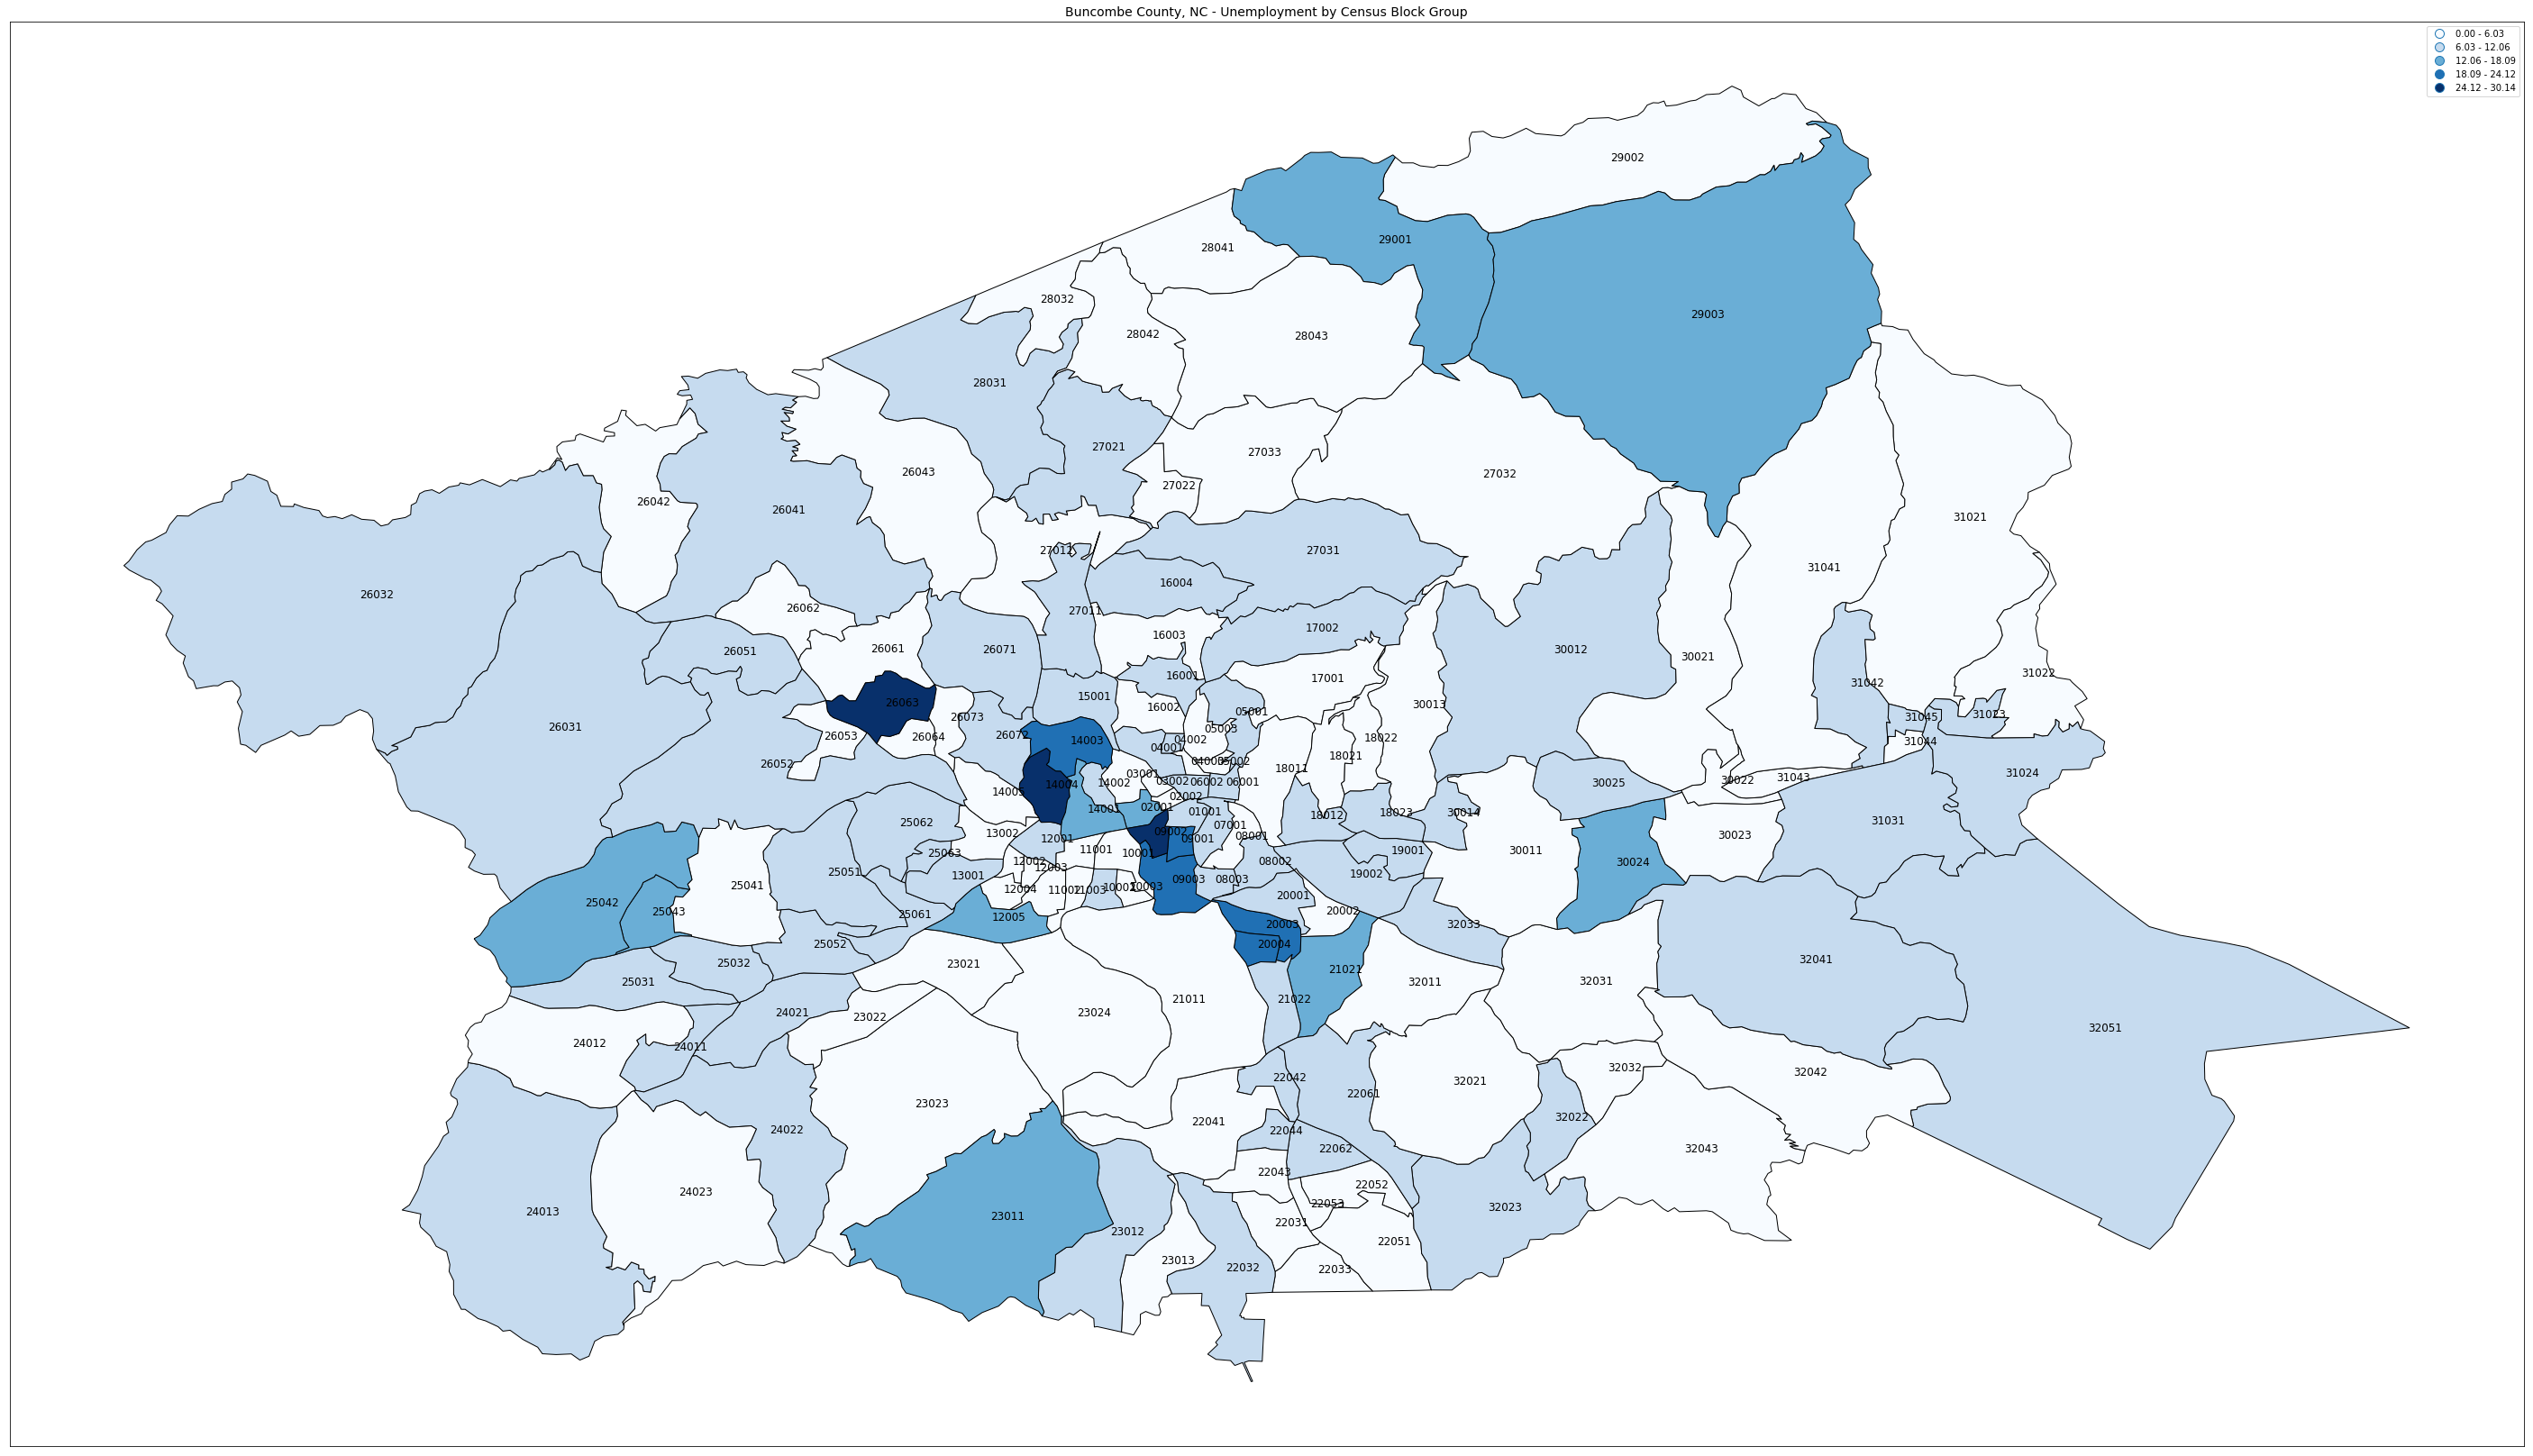

In [34]:
fig, ax = plt.subplots(figsize=(50,50))
ax.set(aspect='equal', xticks=[], yticks=[])
gpd.plot(column= 'percent_unemployed', ax = ax, 
              cmap='Blues', edgecolor='black', scheme='equal_interval', legend=True)

texts = []
for x, y, label in zip(gpd_points.geometry.x, gpd_points.geometry.y, gpd_points["bg_label"]):
    texts.append(plt.text(x, y, label, fontsize = 12))
    
#aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))


plt.title('Buncombe County, NC - Unemployment by Census Block Group', size = 14)

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set(aspect='equal', xticks=[], yticks=[])
joined_gpd.plot(column= 'percent_nohs', ax = ax, 
              cmap='Greens', edgecolor='black', scheme='equal_interval', legend=True)